<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="300" alt="cognitiveclass.ai logo"  />
</center>

Instructor and author: [_Dr. Junaid Qazi_](https://www.linkedin.com/in/jqazi/)

# Logistic Regression


Hi guys,<br>
Very warm welcome to the Logistic Regression with python using scikit-learn lecture. In the previous lecture, we have learned the key concepts and working principle behind Logistic Regression. Its time to learn by doing.<br>


Let's explore one of the most famous and benchmark dataset ["Titanic: Machine Learning from Disaster"](https://www.kaggle.com/c/titanic/data) from kaggle. This dataset is considered the first step to wards classification in machine learning. <br>

Follow this link at [kaggle](https://www.kaggle.com/c/titanic) for detailed description on titanic dataset.<br>

**Data Dictionary**
* PassengerId
* Survived -- 0 = No, 1 = Yes
* Pclass -- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* Name -- Passenger name 
* Sex -- male / female 	
* Age -- age in years	
* SibSp -- no. of siblings / spouses aboard the Titanic	
* Parch -- no. of parents / children aboard the Titanic	
* Ticket -- Ticket number	
* Fare -- Passenger fare	
* Cabin -- Cabin number	
* Embarked -- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In this classification problem, out goal is to predict if a passenger survived sinking of Titanic or not. <br>
First, we will do some exploratory data analysis and then use our understanding in logistic regression to train a model for classification. We then deploy our model on test dataset and see how good the predictions from our model are!<br>
&#9758; *You can directly download the `test.csv` and `train.csv` from kaggle. Data files are also included in course material for your convenience.* <br>
Let's start our journey!

First thing first, let's import some libraries. At this stage, I am sure these libraries are not new to you!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-c73ef116cc50>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


Let's read`"train_titanic.csv"` into `"train"`

In [2]:
train = pd.read_csv('''https://raw.githubusercontent.com/junaidqazi/\
DataSets_Practice_ScienceAcademy/master/train_titanic_Xy.csv''')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis - EDA
Let's overview the dataset using `info()` first!

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Data**<br>
So, we have 891 entries in our train dataset with column `Name` along with other information of the traveler such as passenger class (`Pclass`), `Fare`, `Ticket` and `Cabin` etc. <br>
Notice, Age column have 714 non-nulls whereas Cabin have 204 non-null values. Embarked also have 889 non-nulls. So there is some data missing!<br> Let's do some calculation to find out the % of missing data in each column!<br>
Remember, we have a function `isnull()` in this situation!

In [5]:
#round((train.isnull().sum())/(train.isnull().count())*100,1)
pct_missing = round((train.isnull().sum())/(train.isnull().count())*100,1)
pct_missing.sort_values(ascending=False).head()

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
dtype: float64

We have the numbers now!<br>
* `Cabin` column is missing 77.1% of its data
* `Age` column is missing 19.9% of its data
* `Embarked` column is missing 0.2% of its data

<font style="font-size:12px;color:green;">*Recall and refresh your skills in dealing with missing data, we are going to use those skills at later stage*</font>

`isnull()` return `True` for all the places where the data is missing. Our dataset is large, we better think about graphical visualization using seaborn's heatmap method to visualization missing data! <br>
Let's try!!

<AxesSubplot:>

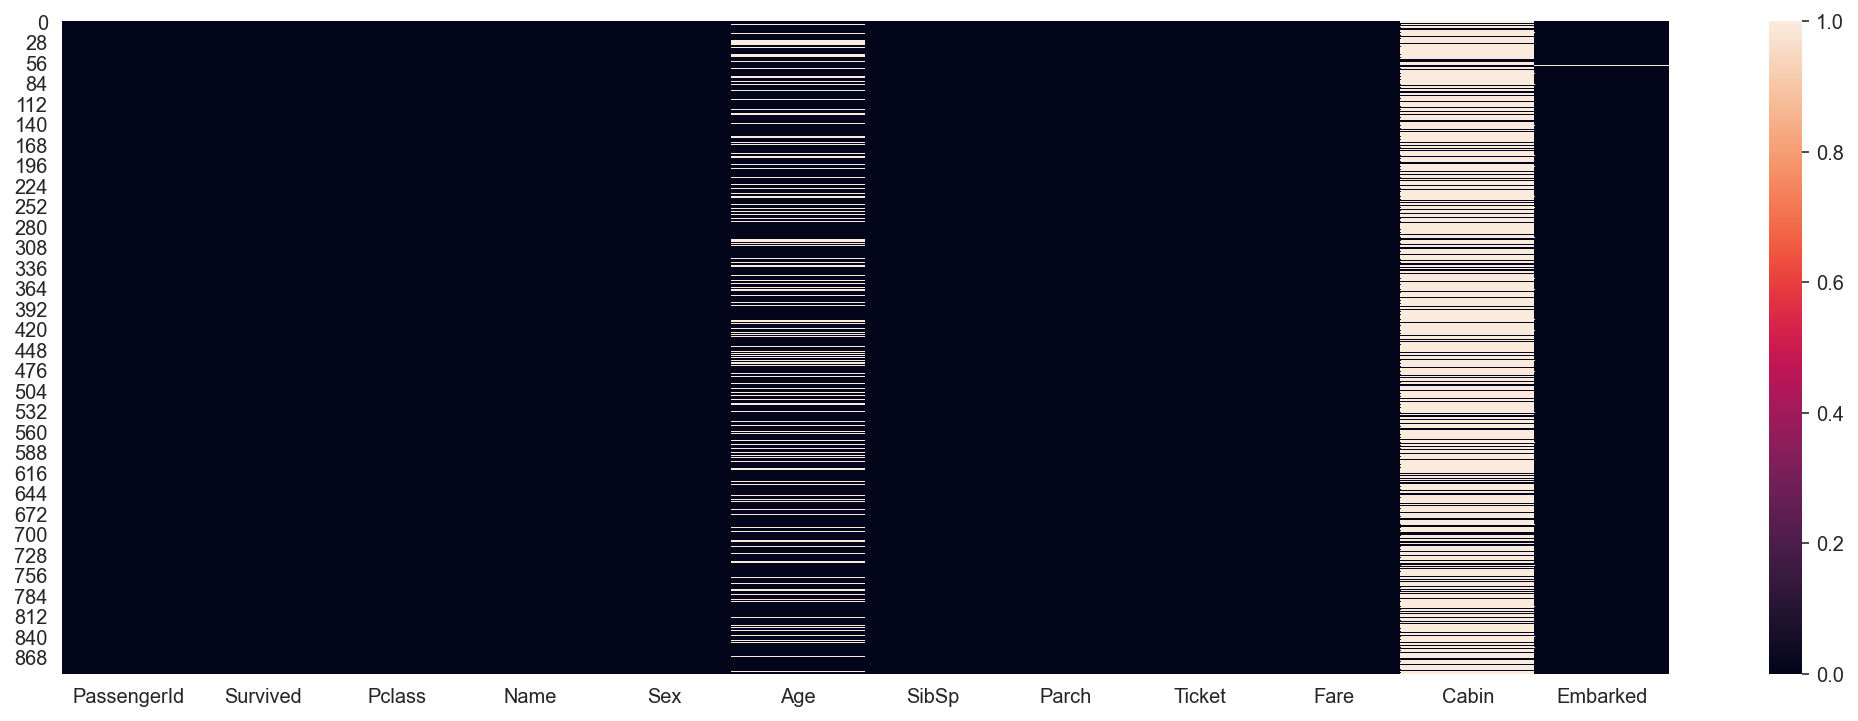

In [6]:
# heatmap using seaborn, you can set the figure size if you want!
plt.figure(figsize = (18,6))
sns.heatmap(data = train.isnull())

The above plot might be ok, but visualization of our heatmap can be improved. `yticklabels` are overlapping and the color bar is also not useful in this case.<br>
We can set `yticklabels` and `cbar` to `False` and also use `cmap = 'viridis'` for cleaner map (you can use color of your choice)!<br>
Let's try again!

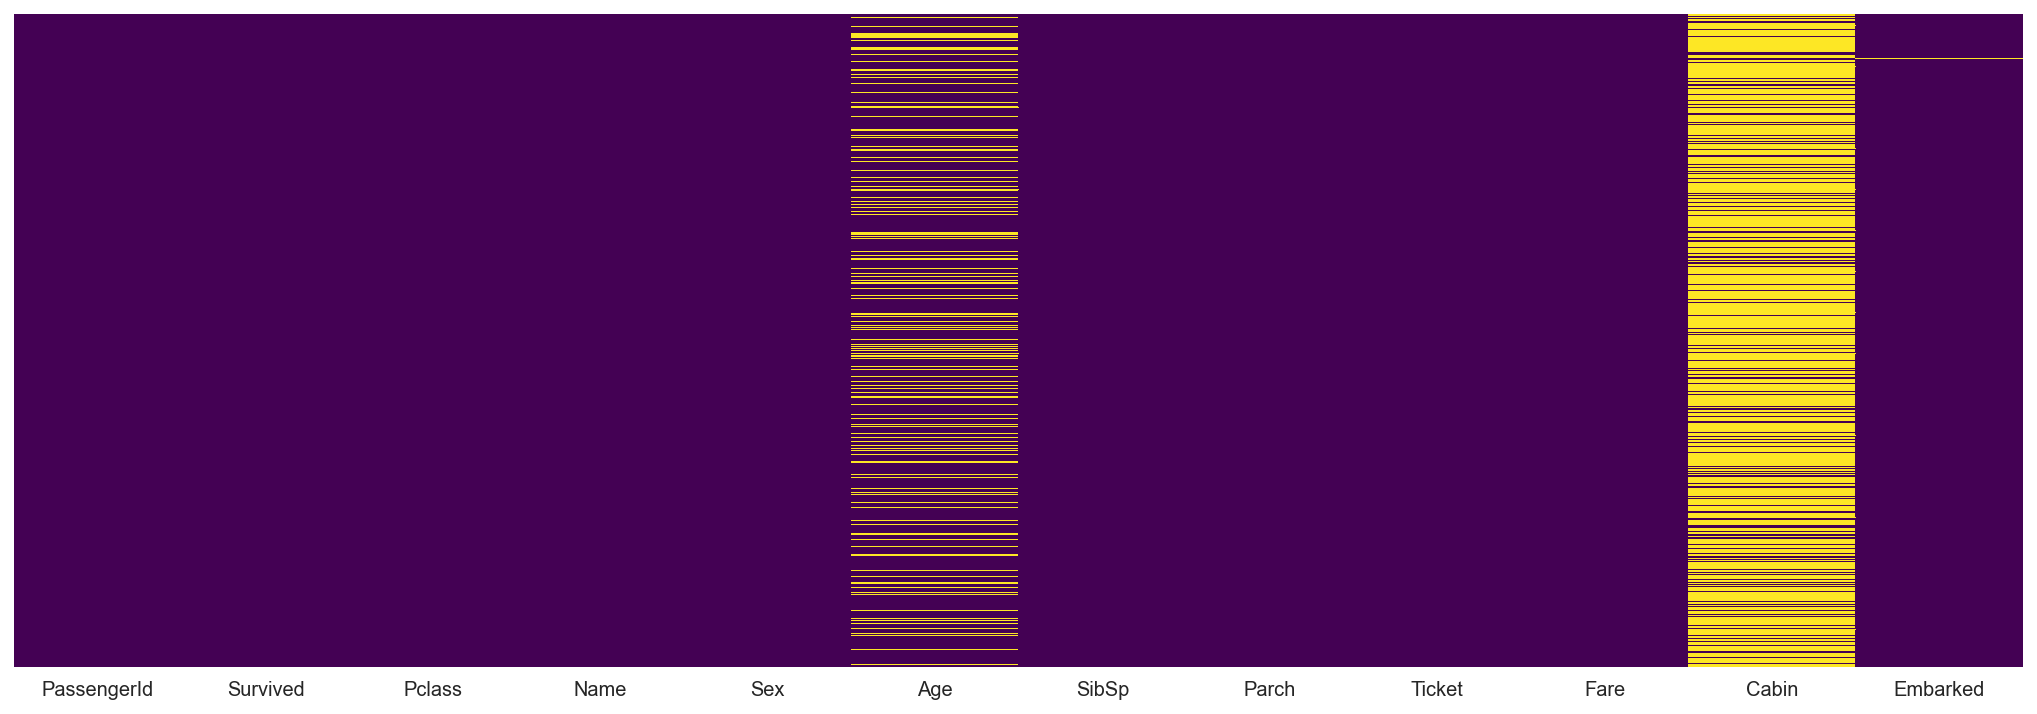

In [7]:
plt.figure(figsize = (18,6))
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis' );

The map looks much better now.<br>
Notice, yellow are `True` which represent the missing data!<br><br>
**Well, we want to know more about the dataset<br>**
we can use `countplot()` to see how many people survived and how many died!

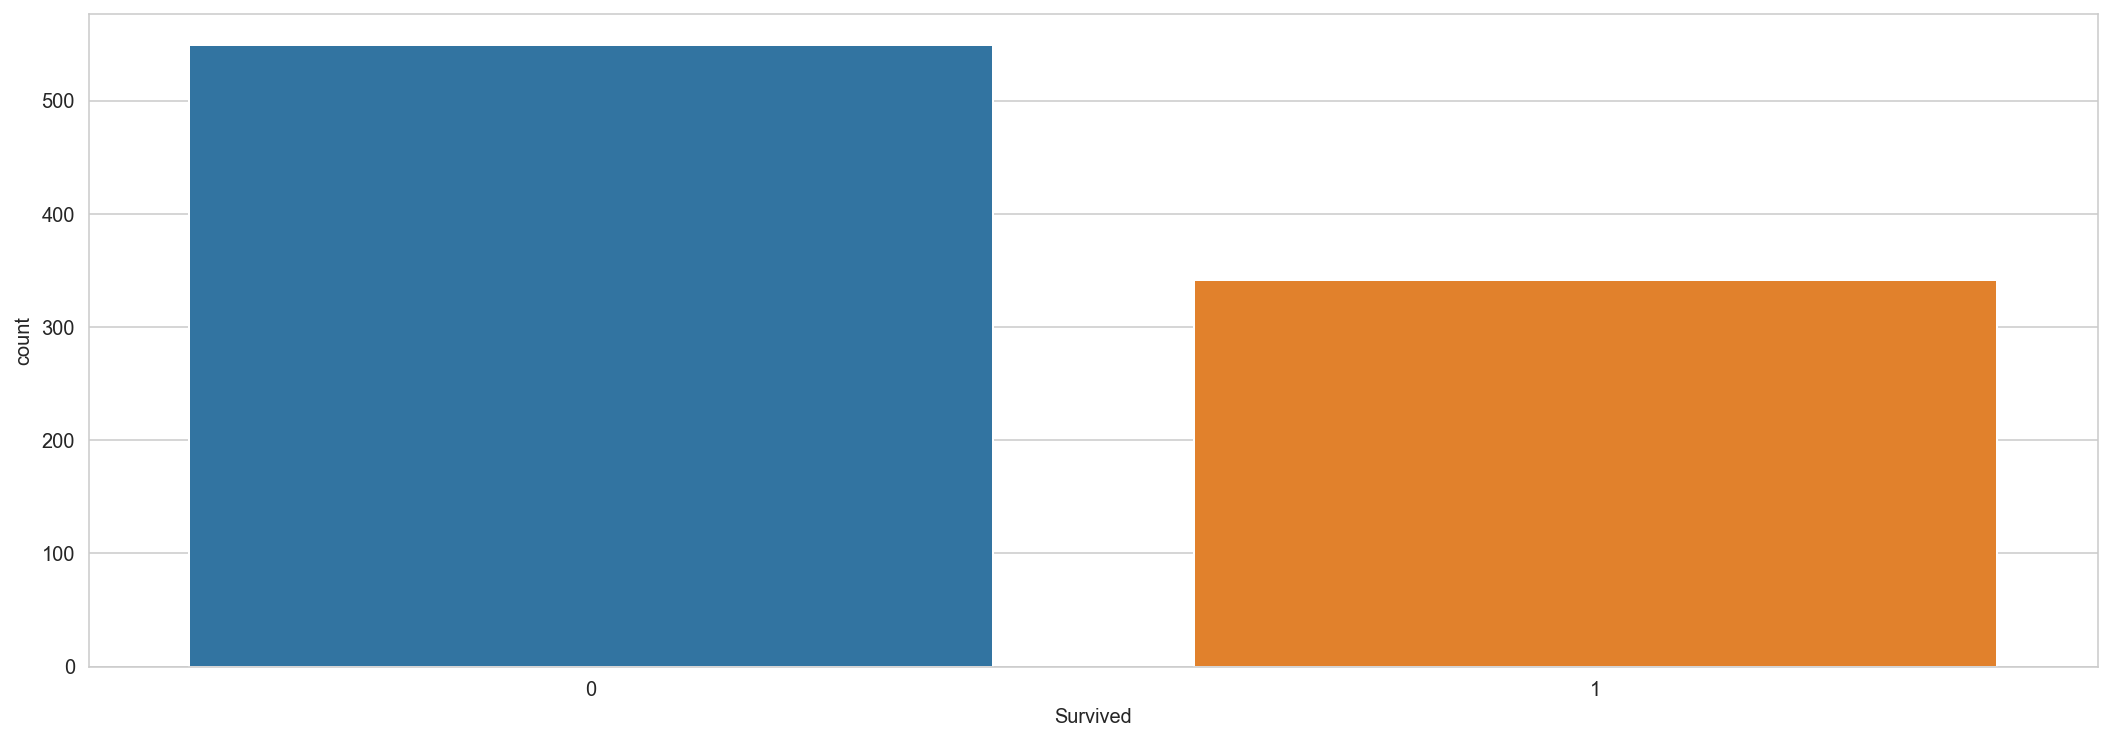

In [8]:
plt.figure(figsize = (18,6))
sns.countplot(x='Survived', data=train);# try different palette, such as 'coolwarm' or anyother!

It's sad that not many passengers survived! <br><br>
**Let's dig into little deeper, pass `hue = Sex` to see the female and male ratio in survived and died passengers.**

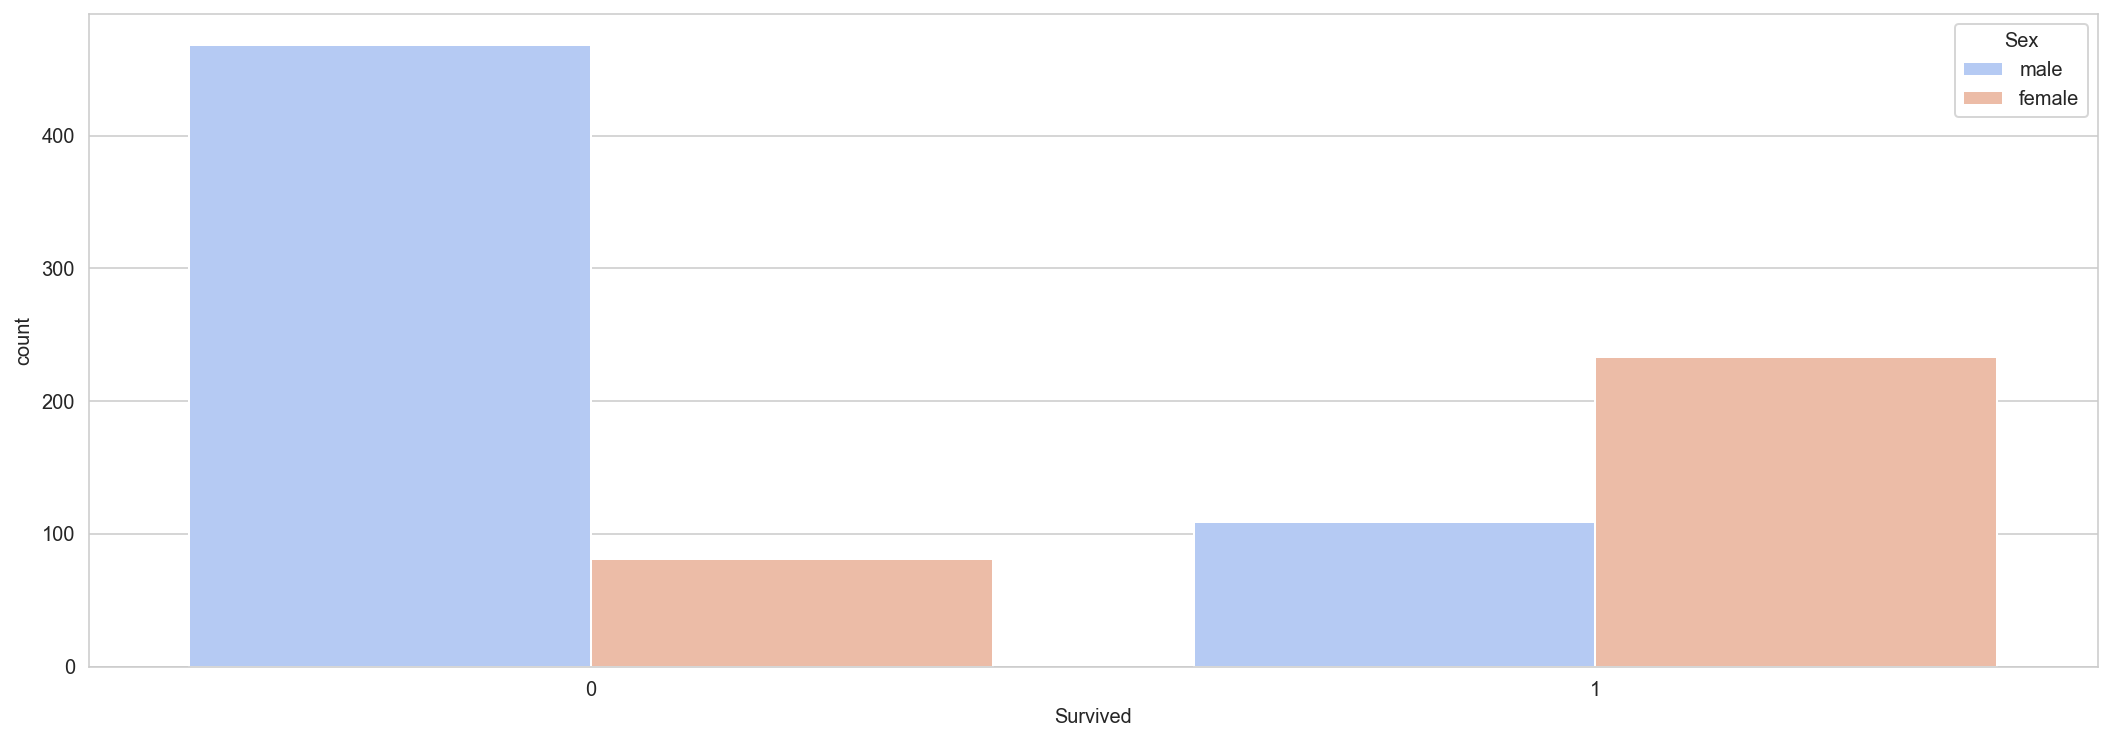

In [9]:
plt.figure(figsize = (18,6))
sns.countplot(x='Survived', hue='Sex',data=train, palette='coolwarm');

The plot suggests that not many males survived whereas, most of the females survived. <br><br>
**We can ask another question here!**<br>
We know there were three passenger classes in the titanic, which class survived the most?<br>
`nunique() or unique()` on `Pclass` and `hue = Pclass` can be useful!

In [10]:
# Let's check the no of classes again to re-confirm!
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

Just a comment for the next `countplot`, you can use any color e.g. `palette='coolwarm'/'rainbow'` etc, it's your choice, I am just trying to keep things simpler using default one! 

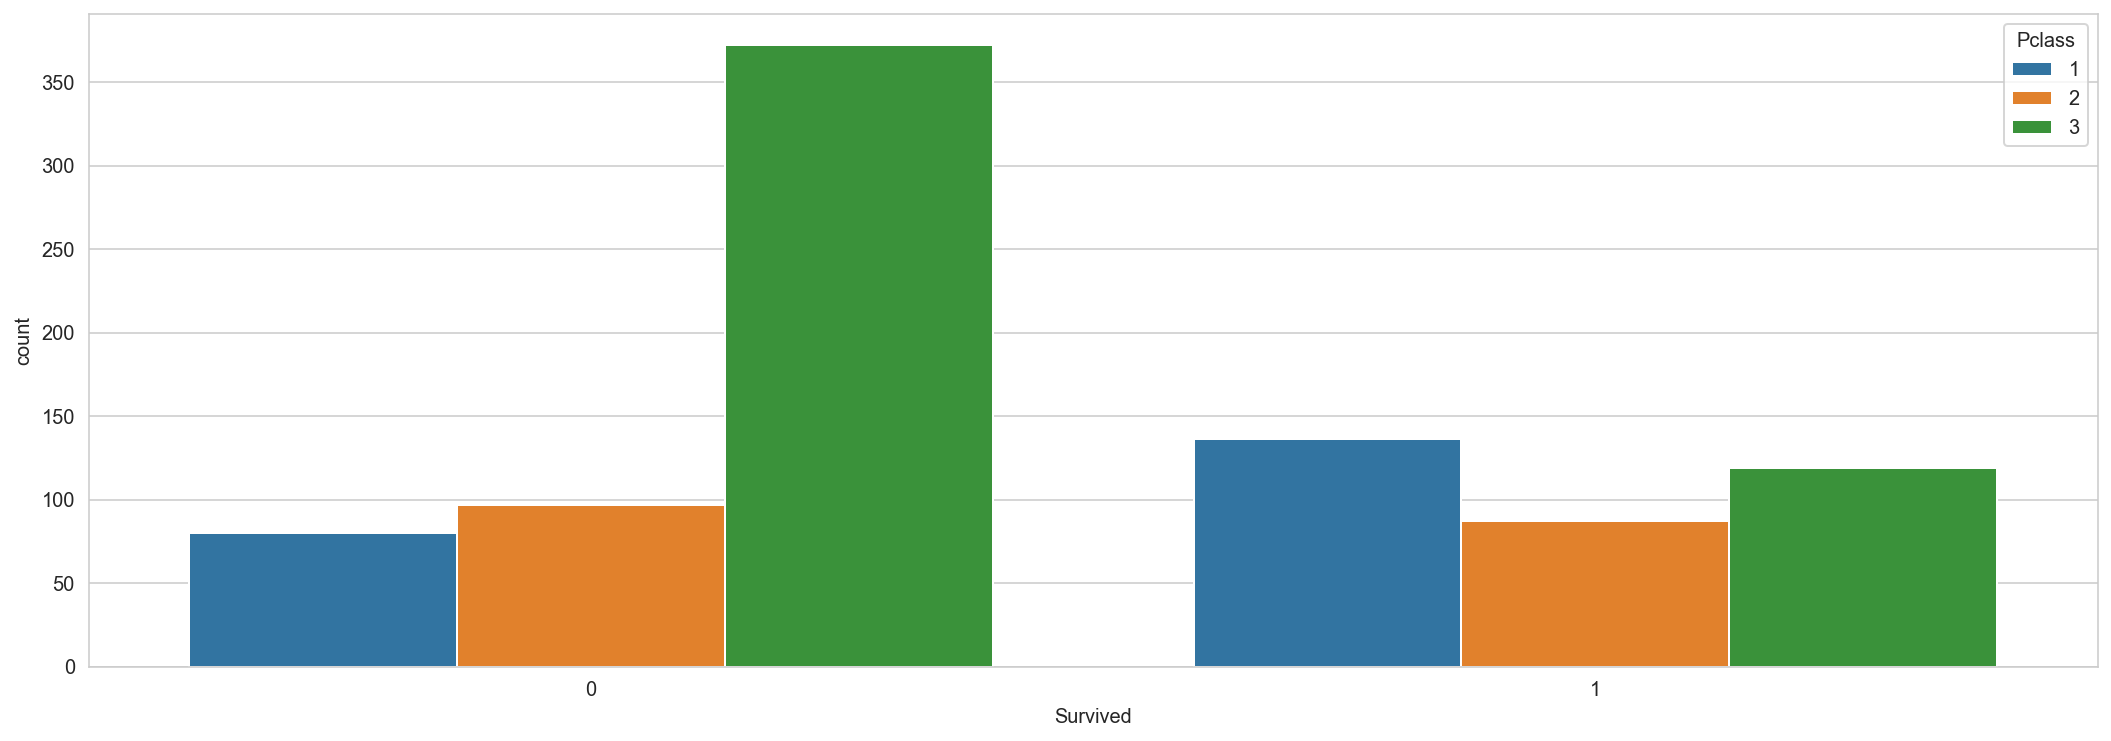

In [11]:
plt.figure(figsize = (18,6))
sns.countplot(x='Survived', hue='Pclass',data=train);

Excellent!<br>
We got even better understanding of our data. Now, we know that more than half of the `class-1` passenger survived whereas most of the `class-3` passengers died.<br><br>
**Let's explore more and see `what was the survival rate` based on the `Port of Embarkation`?**

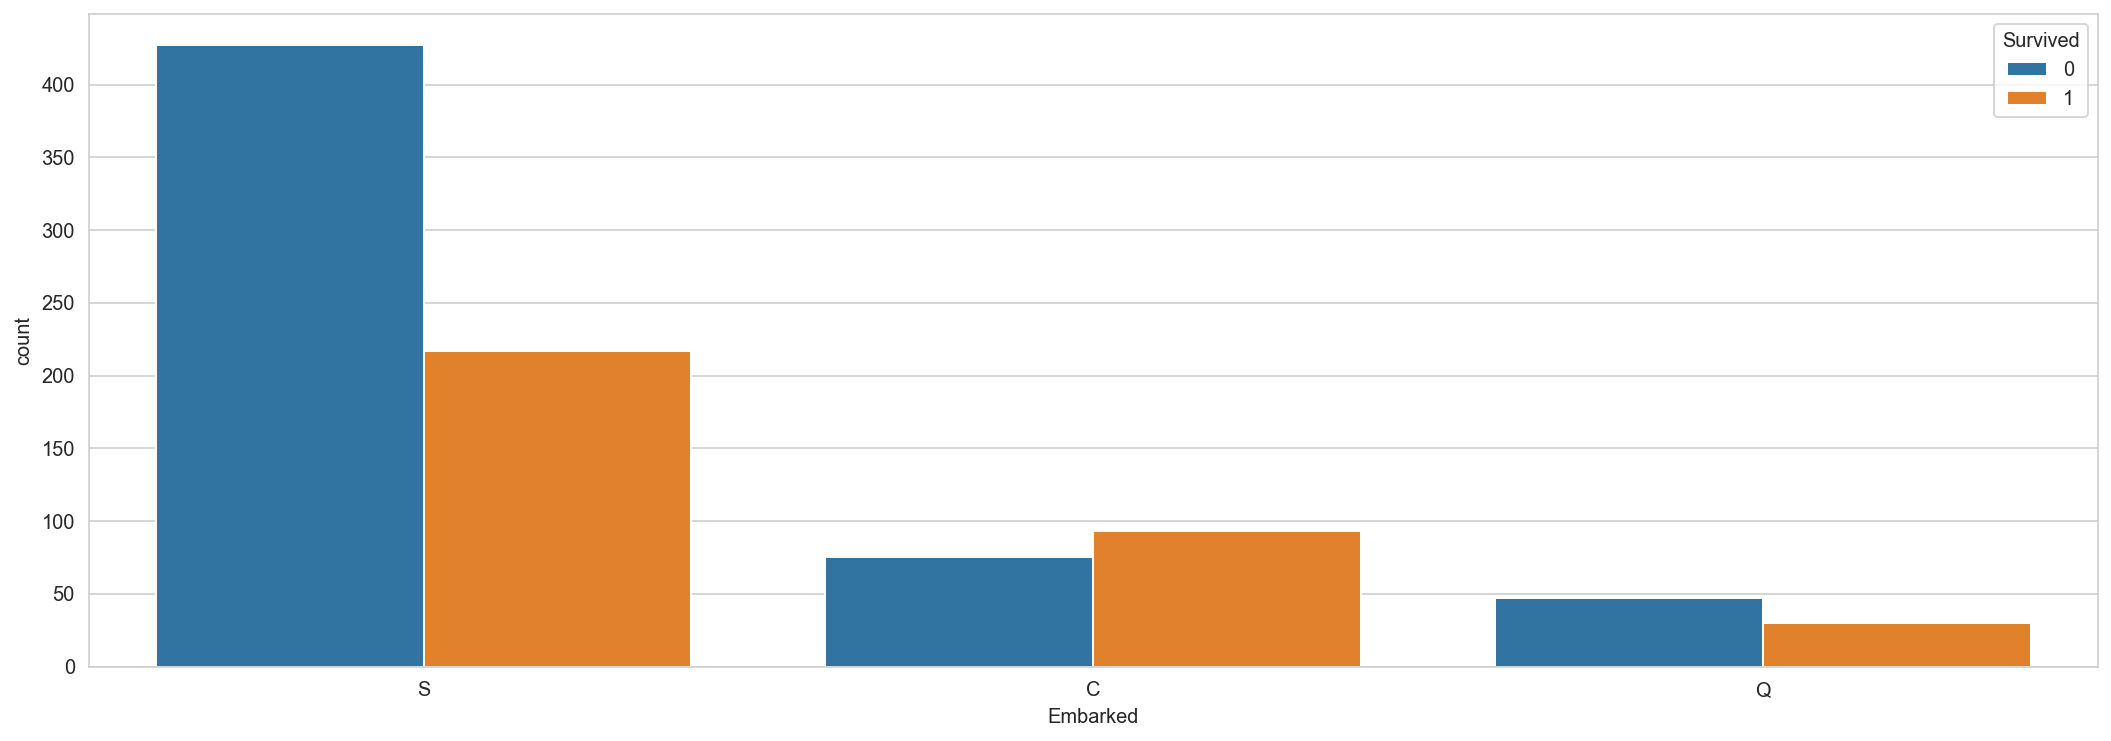

In [12]:
# hue is useful here!
plt.figure(figsize = (18,6))
sns.countplot(x='Embarked',data=train, hue='Survived');#hue='Pclass')

So, it looks like passenger, embarked from Southampton Port have a better chance of survival!<br><br>
This suggest <b>another question</b>, we may want to explore the class of the passenger and their port of embarkation.<br>
Let's pass `hue = 'Pclass'` now!. This is again a `countplot`!

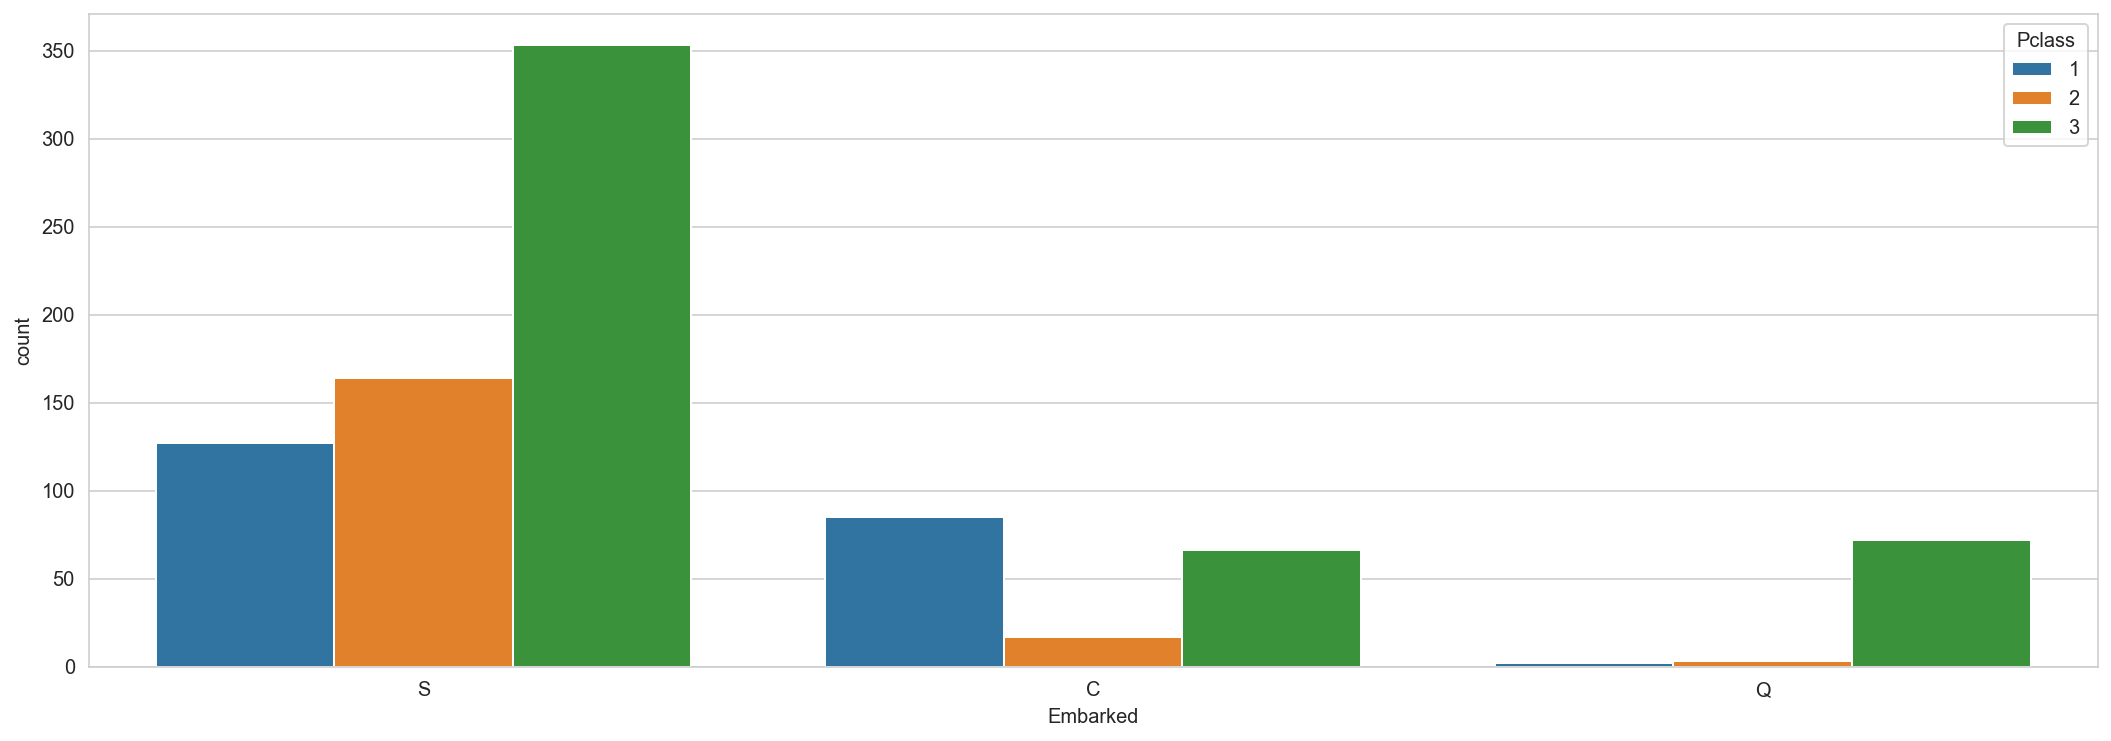

In [13]:
plt.figure(figsize = (18,6))
sns.countplot(x='Embarked',data=train, hue='Pclass');

Di you see, more you more understanding of the data gives better in-sights!<br>
Now, we see, ***Southampton was actually the busiest port for each class!*** <br><br>

***Furthermore, we can see how many passengers traveled with siblings/spouses and parent/children. We can plot a histogram to know how the age was distributed among the travelers.***<br>
<font style="font-size:16px;color:green;"><br>
&#9758; I encourage you to ask questions to yourself and try to apply your EDA skills to learn more about the data. Use different types of plots along with your skills in interactive plotting - Recall the skills you acquired in data visualization section! <b>Practice is a key.</b></font><br><br>
Let's get few more plots and then move on to the next step in which we will be getting our data ready for the machine learning model. We will do some data cleaning and will Convert categorical features to dummy variables using pandas!

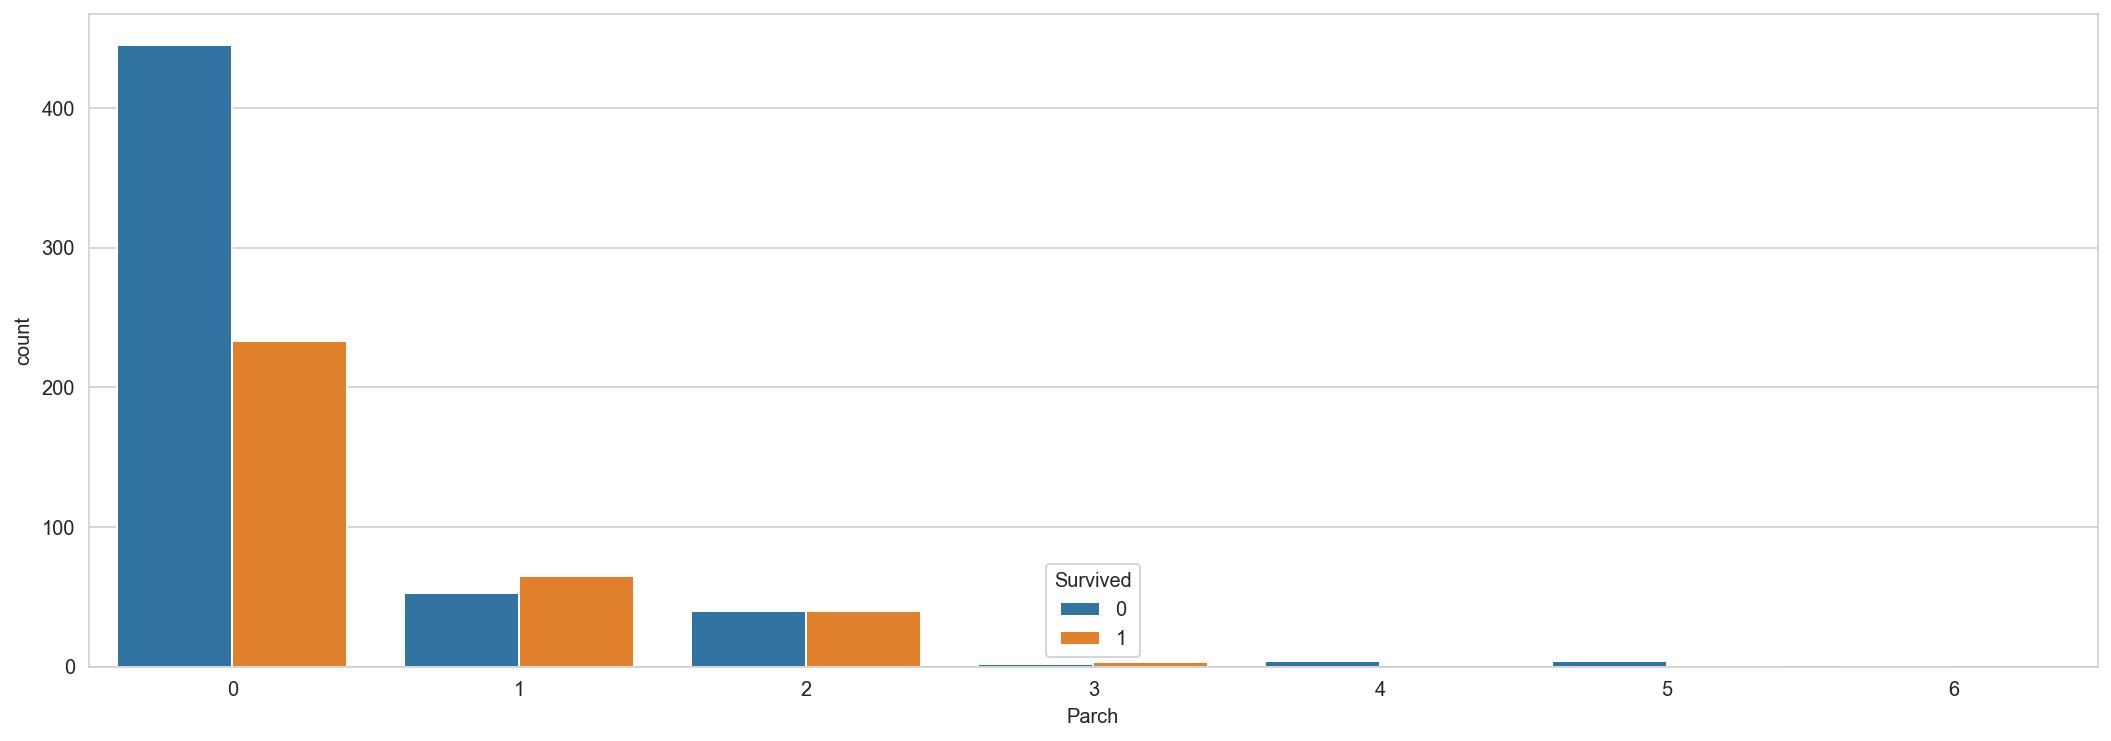

In [14]:
# Parch -- no. of parents / children aboard the Titanic
plt.figure(figsize = (18,6))
sns.countplot(x='Parch',data=train, hue='Survived');

* What do you learn from the plot above? 
* Is there any trend with survival with the group size?

Moving forward, I just want to have another plot to see the age distribution of the passengers on titanic! 

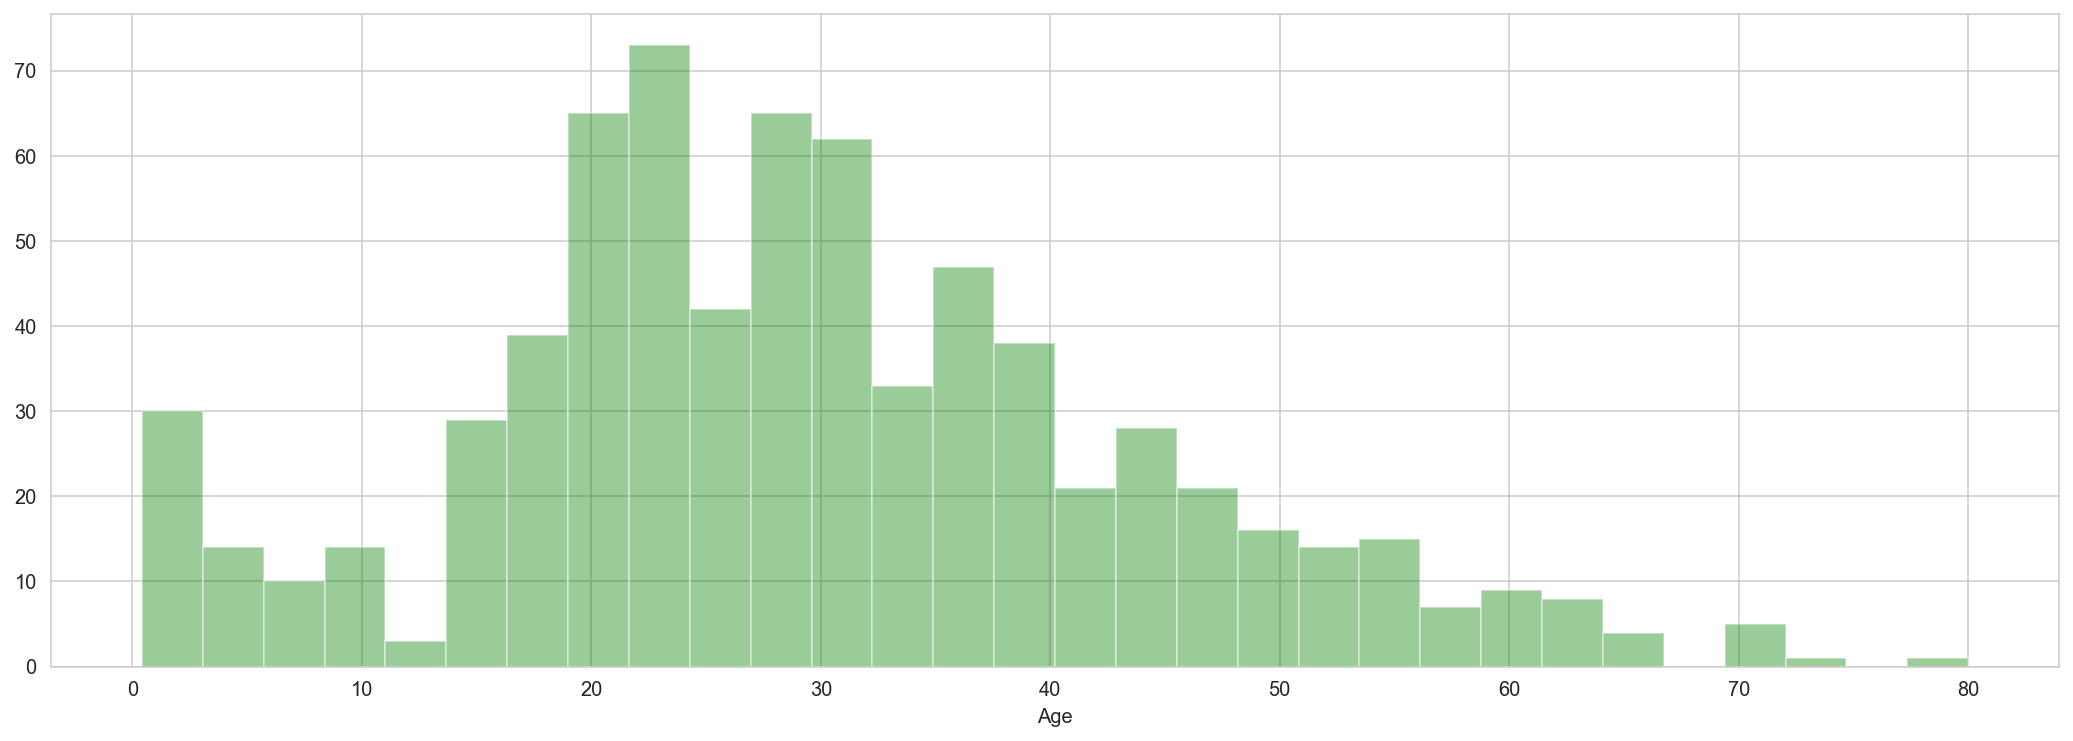

In [15]:
plt.figure(figsize = (18,6))
sns.distplot(train['Age'].dropna(),kde=False,color='green',bins=30); # try with dropna(), what do you see?
#train['Age'].hist(bins=30,color='green',alpha=0.5) # using pandas data visualizations

**<font style="font-size:16px;color:green;">Looks like, it is getting long, let's move on and prepare the data to train our Machine Learning model now. </font>**

## Getting ready to train our Machine Learning model

### Data Cleaning
So, we know form EDA that some data is missing in our dataset, let's deal with that first.<br>
**`Age` column is missing ~ 19.9% of its data.**<br>
A convenient way to fix `'Age'` column is by filling the missing data with `mean` or `average` value of all passengers in that column. **We can do even better** in this case, because we know that their are three passenger classes, **its better to use the average age for each missing passenger for its own class.** <br>
Let's use a `boxplot()` to explore if their is any relationship in class and passenger age?

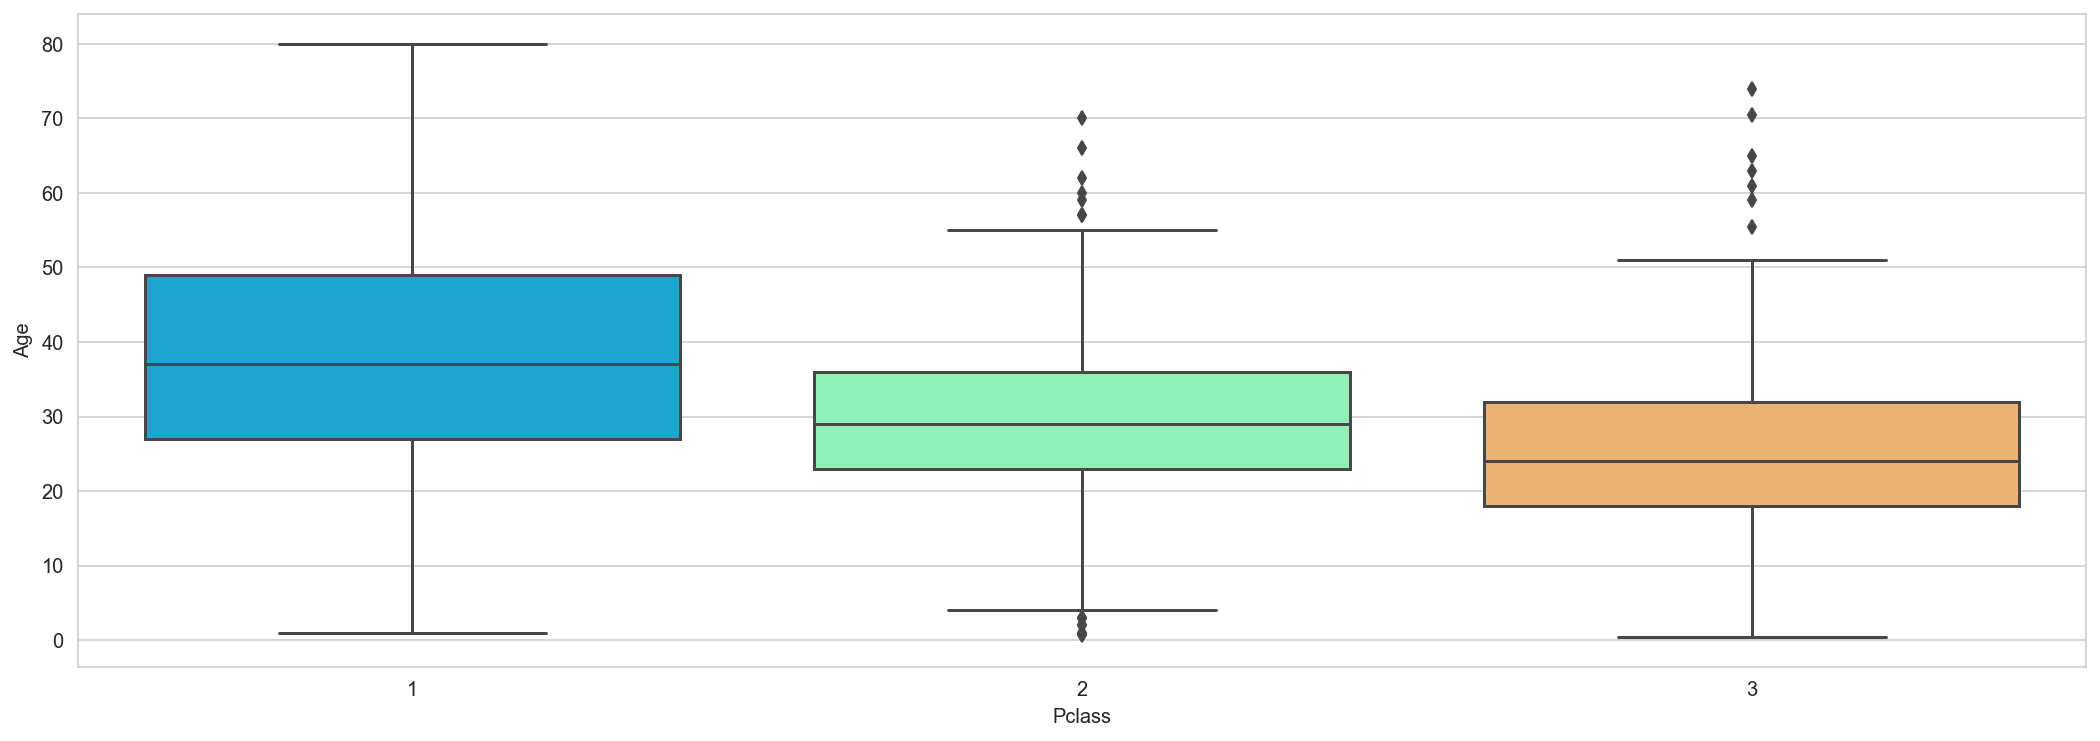

In [16]:
plt.figure(figsize=(18, 6)) # setting the figure size, its subjective
sns.boxplot(x='Pclass',y='Age',data=train, palette='rainbow');

Yes, `Pclass` and `Age` are somehow related, this makes sense, ***older the passenger is, higher the class he traveled in!*** <br>
So our hypothesis to to fill the missing `Age` with respect to the passenger class is the better way to fill in missing data in `Age` column!<br>
Before writing a function for this purpose, we may want to know the average age of the passenger for each class, **`groupby()` is usefull here!**<br><br>
Let's find the average age of passengers in each class first, we only need `Pclass` and `Age` columns for this purpose!

In [17]:
train[['Pclass','Age']].groupby('Pclass').mean() #describe() # try describe with groupby!

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


Now, we have average age for each class, let's write a custom function to fill in the missing values in `Age` columns. Super easy, we can use `if-else conditional statement` in the function!

In [18]:
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

Let's apply the above function to our data now. We can use `apply()` method and pass `axis = 1` for column. (recall from pandas section)

In [19]:
# grab age and apply the impute_age, our custom function 
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# You may want to revise 'impute_age' function and the statement above! 

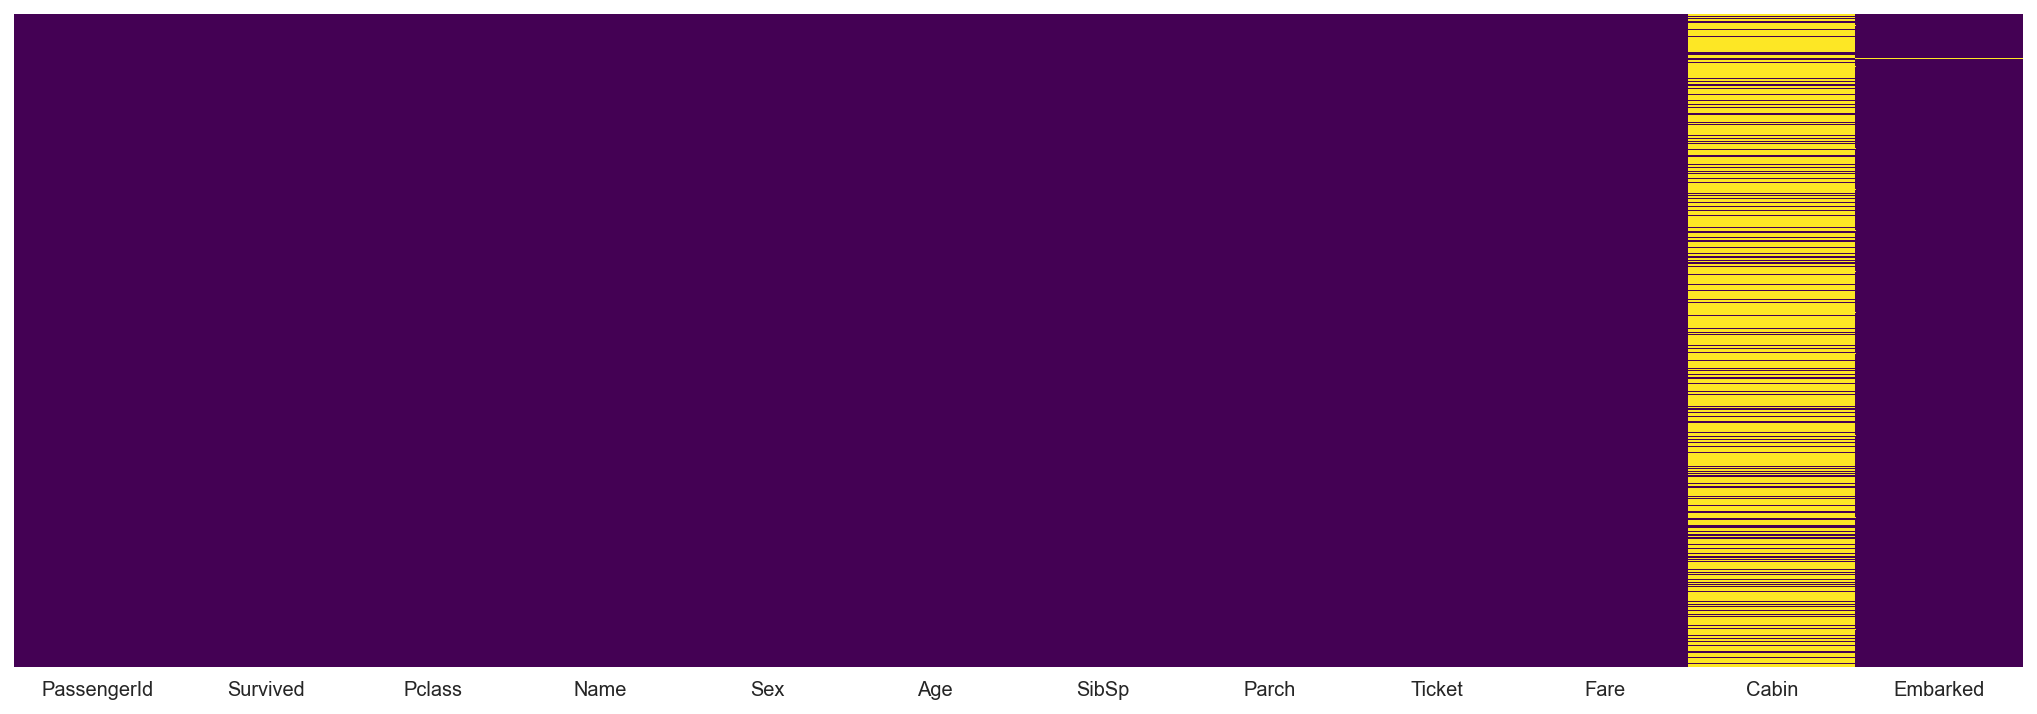

In [20]:
plt.figure(figsize = (18,6)) # just fig size
# Let's try to re-plot the heatmap now!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

So, we got this done, ***no more yellow color in Age*** column. This means we have filled all the missing values in `Age` column using `impute_age` function. 

Now, there is another column,**`Cabin` with ~ 77.1% of missing data.**<br>
This is quite a lot of missing information, at the moment, we can drop this column!

In [21]:
# dropping 'Cabin' column, axis =1 for column and inplace = True for permanent change!
train.drop('Cabin',axis=1,inplace=True)

Let's see how the `heatmap` looks like now!

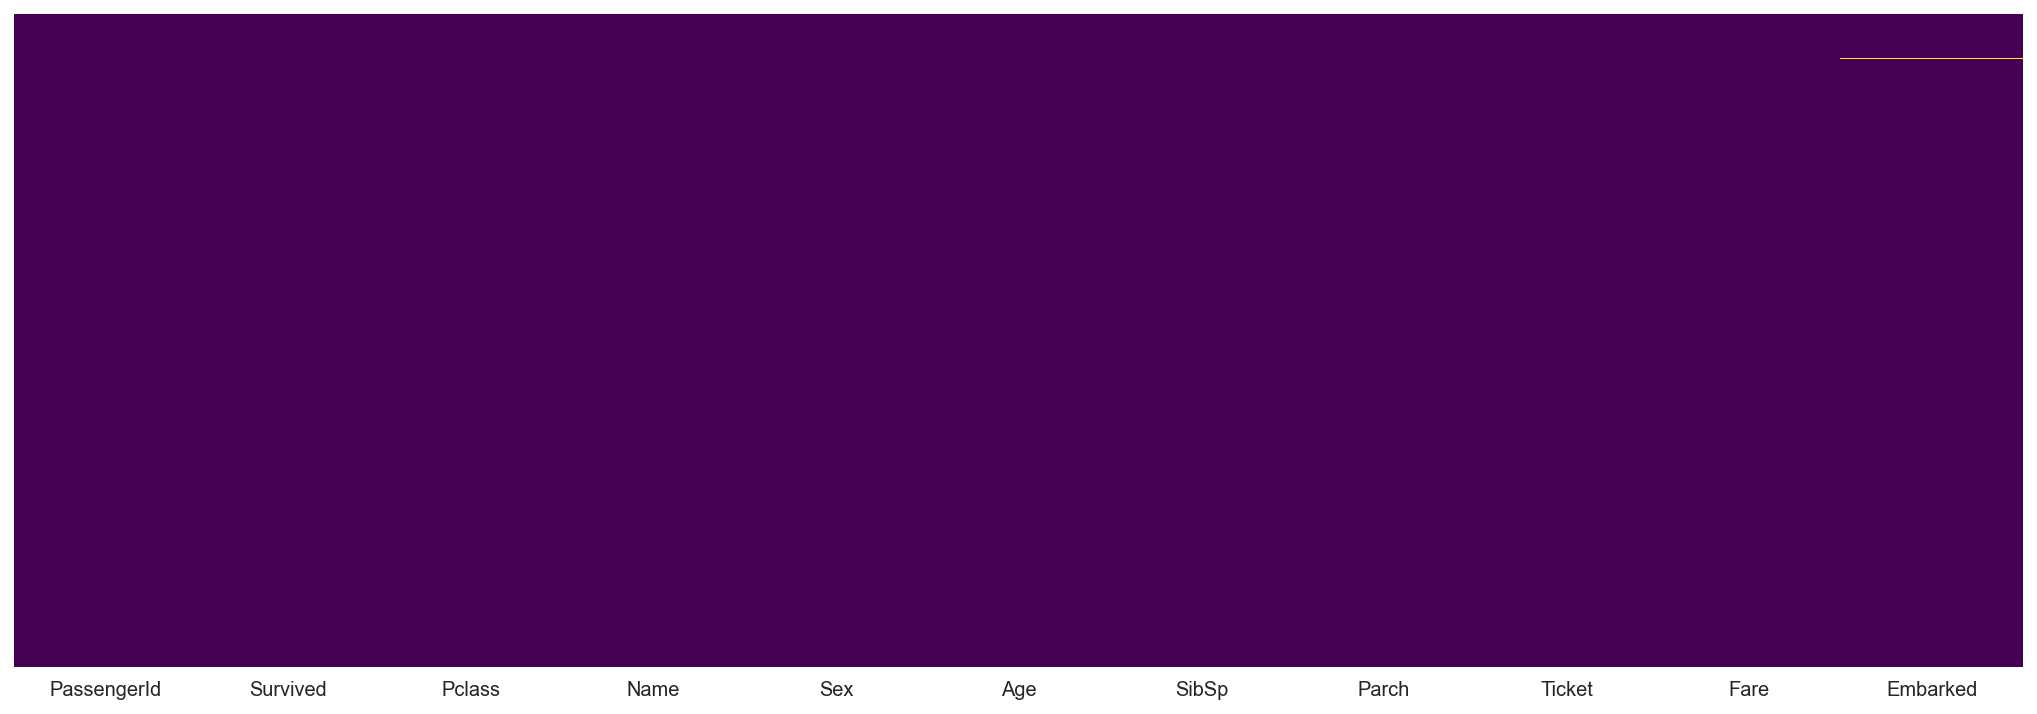

In [22]:
plt.figure(figsize = (18,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

So, we don't have `Cabin` Column in our data now, ***only yellow color is for `Embarked` column. This is only 0.2%***<br>
Let's drop any other missing value in the dataset now, this will essentially drop the rows for missing `Embarked` data. We will re-plot the `heatmap` after this operation.

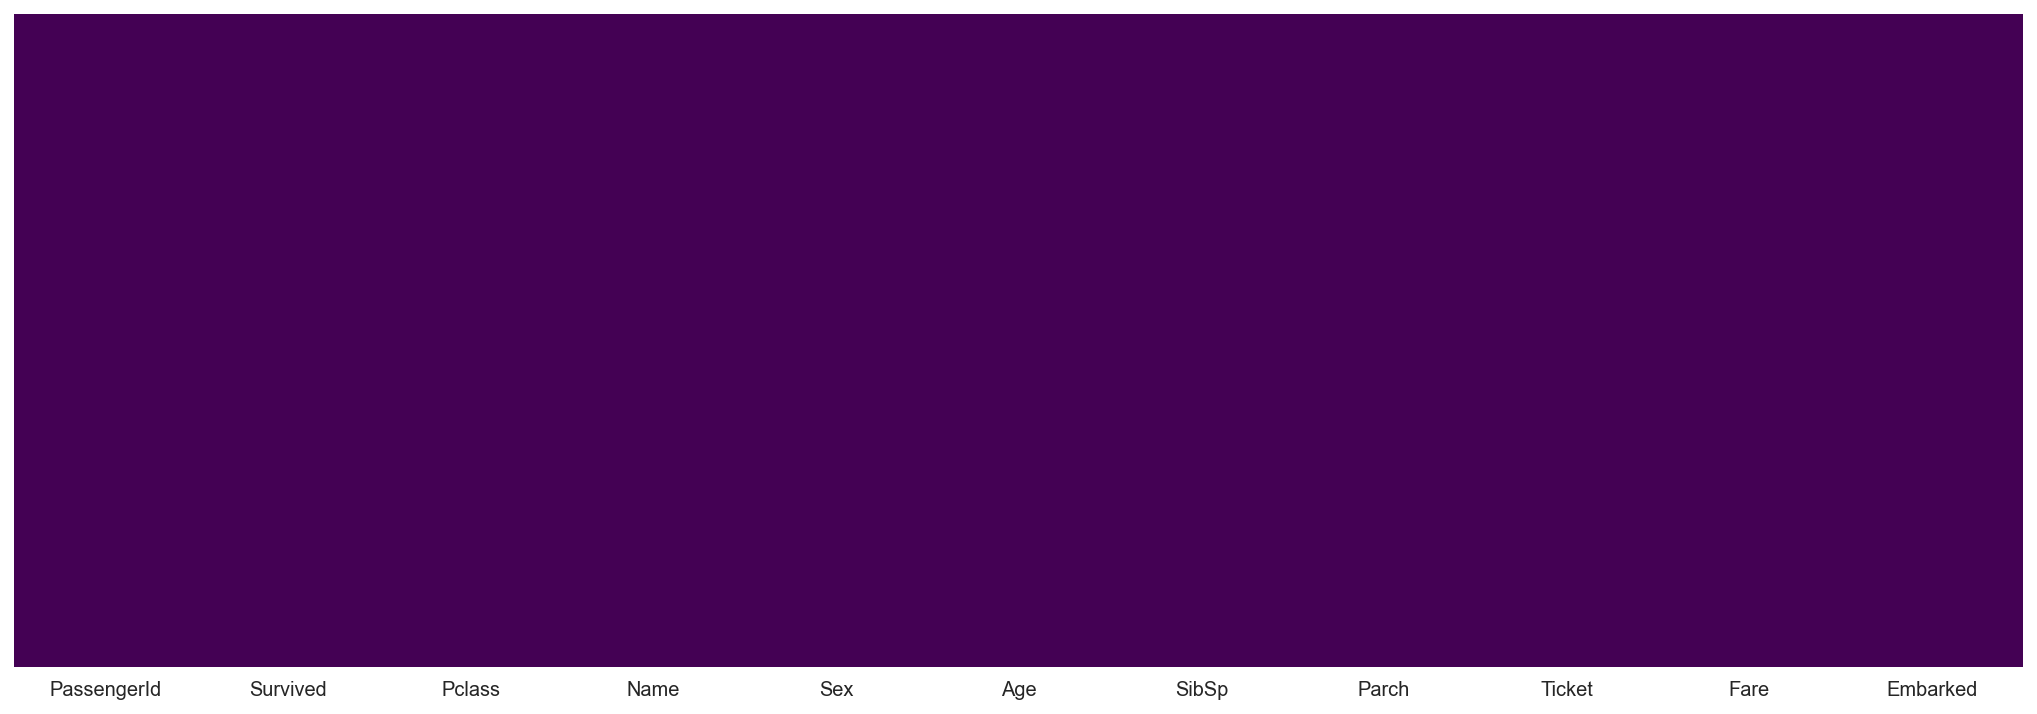

In [23]:
plt.figure(figsize = (18,6))
train.dropna(inplace=True)
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

**Great!** We don't have any missing data in our dataset now!<br>
It's time to deal with the Categorical Features now!<br><br>

### Dealing with Categorical Features
To apply Machine Learning algorithm, we need to convert categorical variable into some indicator variables. <br>
For example, in `Sex` column for `female/male`, we need to input 0/1 to make the Machine Learning model work. For this, we will create a new column indicating the `Sex` as `0/1` for `female/male`, this process is called <font style="font-size:14px;color:green;">***creating dummies***</font>. ***This is important because the Machine Learning model will not take string variable as input to work with.***<br><br>
Fortunately, pandas makes this process very easy for us. Using pandas  built-in method <b>[`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)</b>, we can convert categorical variable into dummy/indicator variables.<br>

Let's pass the `Sex` column and see how it works!

In [24]:
# creating dummies for 'Sex - female/male' column. 
sex = pd.get_dummies(train['Sex'])
sex.head(3)

,female,male
0,0,1
1,1,0
2,1,0


Notice that, we get a dataframe for every single category with 0 or 1 as an indicator value (a column for female and a column for male here). <br>
In this case, one column is a perfect predictor for the other. <br>
For example, ***if female is 0 then it is obvious that male is 0 and vice versa***. This means, if we input both columns to our Machine Learning algorithm, our algorithm will immediately know that if there is `"0"` for `female` then I can perfectly predict it's going to be `"1"` for the `male`. <br>
&#9758; This is known as <b>[Multi-Collinearity](https://en.wikipedia.org/wiki/Multicollinearity)</b> and will mess up with our Machine Learning algorithm, because some columns will be the perfect predictor for the other columns.<br>
**To avoid [Multi-Collinearity](https://en.wikipedia.org/wiki/Multicollinearity), we need to set `drop_first = True` (it is `Flase` by default) in the method `get_dummies()` while creating dummies.**<br>
Let's do this!

In [25]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


So, this is what we want as an input to our Machine Learning model/algorithm! <br>
Let's do the similar process to `Embarked` column as well!

In [26]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


Now, from the above two columns, if Q is 0, S is 0, the Machine Learning algorithm can predict C is 1 because at one time, a passenger can use one port only so Q, S or C, only one can be 1/True. <br><br>
Now, we have dummies in `sex` and `embark` for our related categorical variables, let's use concatenation method to add these dummies to our dataset!<br>
We will pass the list of dataframes `[train, sex, embark]` to `concat()` method and set axis = 1 (for columns). 

In [27]:
train = pd.concat([train,sex,embark], axis=1)

In [28]:
# Always good to confirm the operation!
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


We got new columns `male, Q, S` in our dataframe as replacement columns for `Sex` and `Embarked` to use as inputs to our Machine Learning algorithm. We don't need `Sex` and `Embarked` columns anymore. At the moment, we are not going to use `Ticket` and `Name` columns in this project, they are not much helpful at this stage.<br>

&#9758; <font style="font-size:12px;color:green;"> Later on, if we want, we can do some feature engineering to create new features such as grabbing the first letter in the Ticket, prefix the Name (Mr., Mrs. etc) or last_name and so on....</font><br> 

Let's drop `Sex, Embarked, Ticket, Name` columns for our dataframe/dataset.

In [29]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [30]:
train.head(2)
#train.tail(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


Well, the dataframe looks good, however, we can drop another column `PassengerId`. This is essentially just an index that starts at 1. It is numerical but not very useful for us to predict if the passenger survived or not.<br>
It might be a good idea to drop `PassengerID` column as well!<br> Let's do it!

In [31]:
train.drop('PassengerId', inplace=True, axis=1)

In [32]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


### Good to know

In the above few cells, we have converted categorical features into dummies and then concatenated then in a final dataframe. Scikit-learn provides a module **[`ColumnTransformer()`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer)** that can be very helpful for the above implementation and also scaling the features independently in one go. The module allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This link of scikit-learn would be helpful [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py).

We can actually build a pipeline with steps to preprocess the selected columns such as, dummies/one-hot-encoding, scaling, data imputing strategy and much more including th model that we want to train on the data. Anyhow, the most important thing at the moment is understanding the ways to get solid foundations, you can always explore the ways to combine strategies with less coding efforts once you know how the things work. We can even write our own custom module or pipelines to combine several processes according to our project need, and it is common practice in professional setup. 

These are other useful links to explore: **[make_column_selector](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html#sklearn.compose.make_column_selector)** and **[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)** 

### Excellent work!
**Our data is ready to train our first Machine Learning algorithm for classification.** <br>
Just a quick review on what we did:
* fixed the missing data issue
* created dummies for categorical features
* dealt with Multi-Collinearity issue
* dropped the columns we don't need

At this stage, i am sure that you have realized how important it is to do the Exploratory Data Analysis!<br>
**Let's move on to build and train Logistic Regression Model for our data!**

## Model Building - Logistic Regression
Our dataset is ready for building our first Logistic Regression Model. `train` is our full data, we need to split this into train and test subsets. We can use `train_test_split()` method from `sklearn`. <br>

&#9758;*(sorry for the confusion in train as a full data and train as a train data, that we are going to create a subset next, I started as train and just moved on!)*<br>

&#9758; <font style="font-size:12px;color:green;"> Remember, we have a separate file `test_titanic.csv` for the test data. To deploy trained model on test.csv, we need to repeat all the processing on `test.csv` (same way, we did on train_titanic.csv). You can play with this once you are comfortable with the process.</font>

### Train Test Split
Let's separate features in X and target in y. Survived is our target column whereas all other are features in `train` (the full dataset)!

In [33]:
X = train.drop('Survived', axis = 1) # features or variables
y = train['Survived'] # target, the values we need to predict

### Scaling 

In [34]:
from sklearn.preprocessing import MinMaxScaler #StandardScaler
scaler = MinMaxScaler() #StandardScaler()
X=scaler.fit_transform(X)

In [35]:
X[0]

array([1.        , 0.27117366, 0.125     , 0.        , 0.01415106,
       1.        , 0.        , 1.        ])

In [36]:
# Importing required method from sklearn
from sklearn.model_selection import train_test_split

In [37]:
# Let's keep the default size and states
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, we have `train` subset `(X_train, y_train)` and `test` subset `(X_test, y_test)`. Its just a convention to use X and y for this! Good to follow.

### Training
To train our logistic regression model, we need to import `LogisticRegression` from `linear_model` family in `sklearn` and the we need to create its instance! *(same as we did in linear regression part)*

In [38]:
from sklearn.linear_model import LogisticRegression # importing 
logR = LogisticRegression() # creating instance "logR" <shift+tab>

In [39]:
# Training the model on our training dataset -- Reminder: <shift+tab> for docstring
logR.fit(X_train, y_train)

LogisticRegression()

So, Our model is trained on the given `train` subset `(X_train, y_train)` and the default parameters are shown above.<br>

### Regularization:
Before we move on for predictions, ***I feel like I should talk about `"C = 1"` the first parameter in the model above and `"penalty = 'l2'"`.***<br>

<img style="float: center;height:300px" src="Under_Over_Fitting.png">

In the figure above, we have an example of under-fitted and over-fitted models on left and right. The middle one is generalized and a good model for unseen data and this is where `penalty` term makes the difference. Regularization or `penalty` term, which penalizes, specifically the "large" weight coefficients and discourages learning a more complex or flexible model. **This avoids the risk of over-fitting.**<br>
***Its important to understand that we don't want our model to memorize the training dataset, we want a model that generalizes well to new and unseen dataset.*** <br>
`L2` is a default regularization in scikit-learn for logistic regression, this is also known as Ridge, and the other one is `L1` regularization, also know as Lasso. The difference between the L2 and L1 is just that L2 is the sum of the square of the weights, while L1 is the sum of the weights.<br>
Now, `C` parameter, this is inverse of regularization strength, smaller values of `C` specify stronger regularization. 

So, once again in a very simple language:<br>
&#9758; *Regularization is an act of modifying a learning algorithm to favor simpler prediction rules and to avoid over-fitting. Most commonly, regularization refers to modifying the loss function to penalize certain values (specifically the large ones) of the weights our model is learning.*<br>

Well, I think this should be enough on regularization, if you want to explore more, please read the suggested material in theory lecture. <br>

Let's move on and get the predictions for our test dataset from trained model `logR`.

### Predictions and evaluation
Out model is trained on the given `train` subset `(X_train, y_train)`.<br>
Let's get the predictions for test data `(X_test)` and then evaluate the performance of our model. 

In [40]:
predictions = logR.predict(X_test)

**Evaluation** process has its own importance, we want our model to be as good as possible in predictions. scikit-learn provides a very nice and efficient way to evaluate classification tasks using its `classification_report` module. <br>
Let's import this module and use for evaluation<br>

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       184
           1       0.73      0.75      0.74       110

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



The classification report tells us about precision, recall, f1-score and support cases for each class along with their averages.<br>
It all up to us, if we don't want the classification report and interested in the confusion matrix to calculate any specific value, we can get that one as well (recall lecture notes).<br>
Let's get the pure confusion matrix using scikit learn now. We need to do another import.

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
# Let's pass the y_test and predictions to get the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[153  31]
 [ 28  82]]


**Optional:**<br>Always nice to present your results self-explanatory. The above confusion matrix can be presented in a nice looking dataframe using simple code. 

In [45]:
df = pd.DataFrame(confusion_matrix(y_test, predictions),
                  columns=["Predicted False", "Predicted True"],
                  index=["Actual False", "Actual True"])
# We can set the background as well!
df.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,153,31
Actual True,28,82


### Predicting probabilities instead of class (0/1):
In the model above (logR), we have predicted the class for each datapoint. However, there is a probability associated with each class (recall the theory notes). Sometimes, we may want to predict the probabilities for each class as well. These probability values will give us more control on the results and we can even calibrate the threshold accordingly. <br>
*Recall theory notes, where we discussed that in logistic regression, our cut-off line is the probability of 0.5 (for example, class 0 for a probability in `[0.0 to 0.49]` and class 1 for a probability in `[0.5 to 1.0]`). What if we want to re-adjust this probability threshold and tune the behavior of our model for a specific problem, say we want 1 for those with probability in `[0.6 to 1.0]`. We can implement this once we know the probabilities.*<br>
Let's try to look at this thing as well, our focus is to learn all the possible aspects so that we can prepare ourselves to present in the industry!

In [46]:
# predicting probabilities for the test data
prob_test_set = logR.predict_proba(X_test)#, predictions

Now, we have the predicted probabilities in `prob_test_set` and predicted class in `predictions`. Let's print them together for the first 5 datapoints only!

In [47]:
print("Predicted class for the first 5 datapoints in test set:")
print(predictions[0:5])

print("\nPredicted probabilities for first 5 datapoints in test set:")
print(prob_test_set[0:5])

Predicted class for the first 5 datapoints in test set:
[0 1 1 0 1]

Predicted probabilities for first 5 datapoints in test set:
[[0.88644973 0.11355027]
 [0.07785792 0.92214208]
 [0.23706935 0.76293065]
 [0.75980074 0.24019926]
 [0.07503464 0.92496536]]


In the above output, we can clearly see that for a predicted class `1`, we have probability higher than 0.5 at second place (index = 1).

Ok, this is cool, we know how to predict class and get the respective probability value. I want to move on and introduce another concept here, ROC-Curve. (*quick recall on the theory lecture is required*) 

## Receiver operating characteristic (ROC) Curve:<br> 

ROC curve is a graphical plot that describe the ***diagnostic ability of a binary classifier.***

We create the ROC curve by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. TPR is also known as `sensitivity`, `recall` or `probability of detection`, whereas, the FPR is also known as the `fall-out` or `probability of false alarm` and can be calculated as `(1 − specificity)`. <br>
We can think about ROC curve **"the sensitivity as a function of fall-out"**. 
The ROC curve can be a great tool to compare different models for different thresholds and the area under the ROC curve can be used as a summary of the model performance, however, it does mean that a larger area under the ROC curve (AUC) is usually better. <br>
Let's move on and create the ROC Curve in our case. 

In [48]:
# We need to do some imports from scikit learn again 
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
# Computing Area Under the ROC Curve from prediction scores.

AUC_ROC = roc_auc_score(y_test, prob_test_set[:,1]) #<shift + tab> to learn more
#prob_test_set[:,1] will gives the probabilities for all 1 ([0.5 to 1.0]) and 0 ([0 to 0.49])

print('Area Under ROC Curve: %.3f' % AUC_ROC)

Area Under ROC Curve: 0.860


In [50]:
# Computing Receiver operating characteristic (ROC)
fpr, tpr, thresholds = roc_curve(y_test, prob_test_set[:,1])

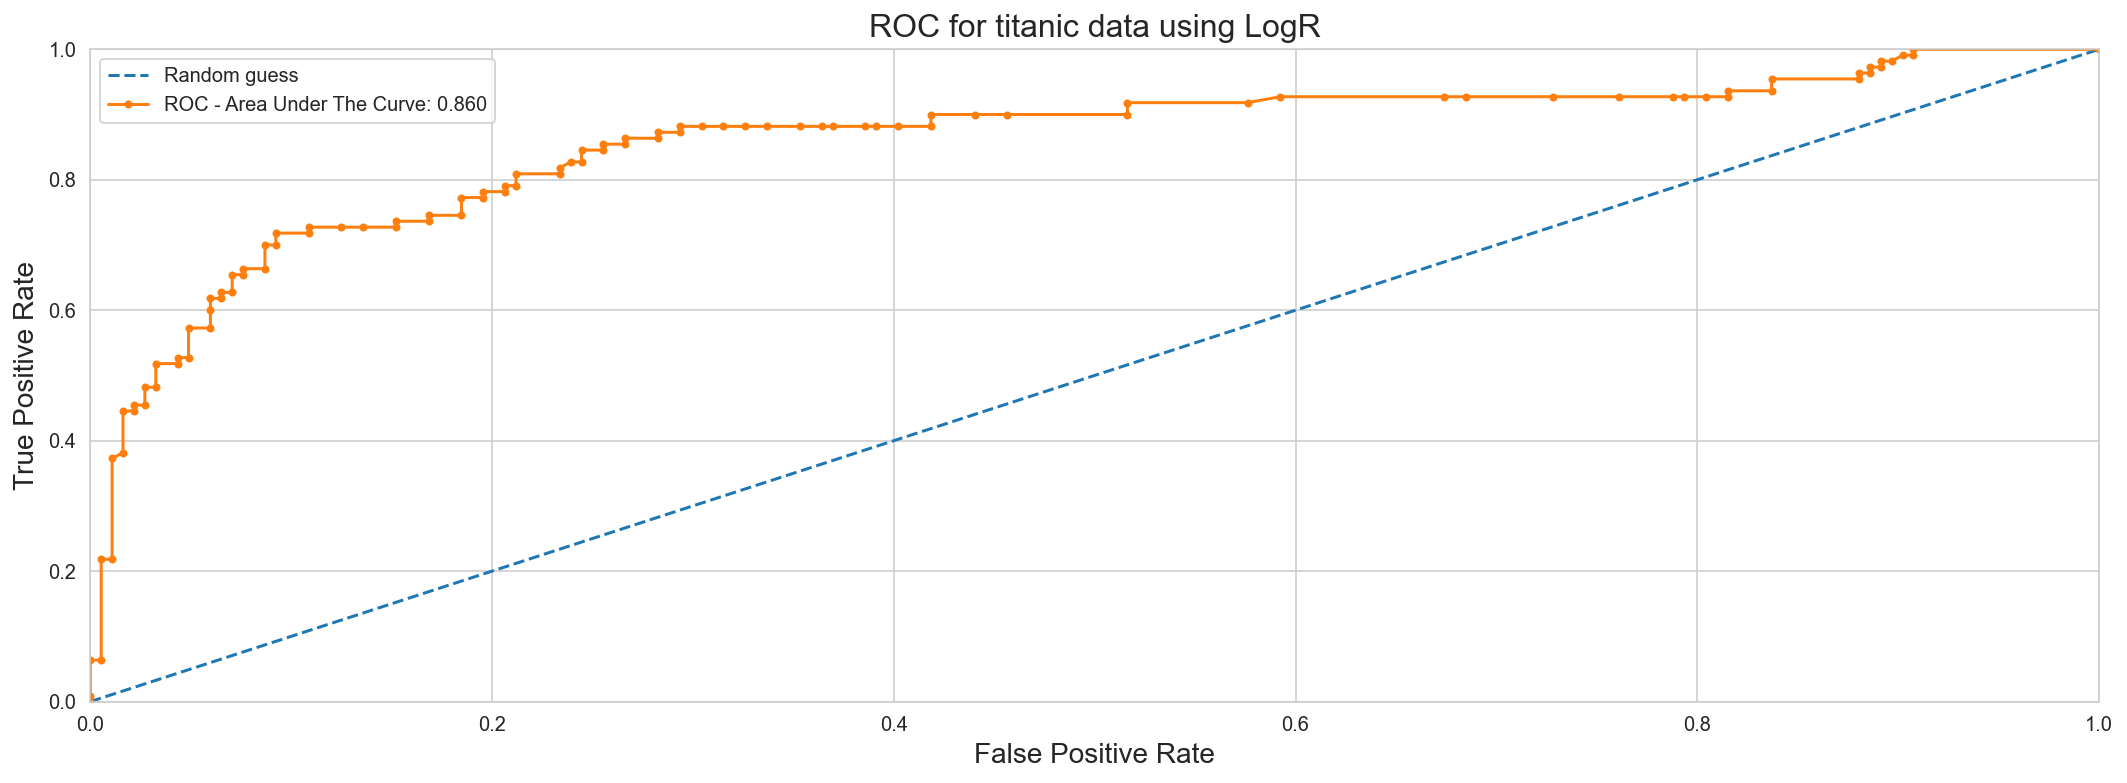

In [51]:
# Let's get the plot now!
# plot no skill - A line for random guess
plt.figure(figsize=(18,6))
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'ROC - Area Under The Curve: %.3f' % AUC_ROC)

# let's set the limits (0,1)
plt.xlim([0, 1])
plt.ylim([0, 1])

# good to put title and labels
plt.title('ROC for titanic data using LogR', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
# putting the legends  
plt.legend();

Now we got the ROC Curve, good to know few more points:<br>
* ROC curves are typically used in binary classification to study the output of a classifier or a machine learning model. 
* If we want ROC cure for a **multi-class** classification problem, we need to **binarize the output** to draw one ROC curve per label.
* **Ideal Point** is the top left corner of the plot, where we have `FPR=0` and `TPR=1`.
* Steeper ROC curves maximize the `TPR` while minimizing the `FPR`. A good trained and a skillful model will assign higher probabilities to randomly chosen (unknown data-points) real positive occurrences than a negative occurrences on average. In general, such models are represented by curves that bow up to the top left (Ideal Point) of the ROC plot.

*Smaller values along X-axis in ROC plot indicate lower False Positives and higher True Negatives (don't confuse TRP with True Negatives). Larger values on the Y-axis of the plot indicate higher True Positives and lower False Negatives.*

**`Sensitivity vs Specificity: (a recap)`**<br>
* **`Sensitivity/true positive rate/the recall/or probability of detection`** measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).
* **`Specificity/true negative rate`** measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

### Saving the model:
**Excellent work!**<br>
We have our trained model now. Same as in the previous lecture, we want to save the model on our disk so that we can load this trained model and use it at later stage. Let's do this. 

In [52]:
import pickle 

In [53]:
# save the model to disk
filename = 'final_model.sav'

# logR is our mode, see above!
# file will be stored on the disk, see the working directory 
pickle.dump(logR, open(filename, 'wb')) # wb is stands for writing only in binary format

In [54]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # rb stands for reading only in binary format

In [55]:
# let's do predictions using stored model after loading
predictions = loaded_model.predict(X_test)

In [56]:
# Let's pass the y_test and predictions to get the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[153  31]
 [ 28  82]]


Compare the results! Now you know how to save the trained model, load it and use if for the unknown data!

We are done with our first classification project. I hope you enjoyed the journey. <br>

In this project, we have did lots of steps that we usually do as a Data Scientist on real life datasets. Most of the times, we clean the data and transform it into an acceptable format so that we can feed it as an input to train our machine learning algorithm. You may have noticed that the Machine Learning libraries are quite simple and straight forward to use. We spend significant amount of time in data cleaning and preparation. And yes, understanding the working principal and theory behind the model is very important.<br>

&#9758; Considering the amount of data we have used in this section, the results are not very bad, however they are not very good as well. They can be improved for the same model if you we use full dataset. <br><br>

**To Do:  Few thing that you may want to consider while practicing:**<br>
* Notice that the `Pclass` column is actually a categorical column, you only have three classes. You can get dummies for `Pclass` column as well. Try getting dummies for `Pclass` column and re-run the Machine Learning section to see the difference in you results. This would also be a good practice exercise. You will also learn how the Machine Learning algorithm treat a column as a category versus a continuous variable. 
* Do you think that you can get any information from the `Ticket` or any other column.
* Grab the prefix/title (Mr. Mrs. Dr. etc) from `Name` as a feature

Titanic dataset is very popular for Classification problem and their are number of [good kernels on kaggle](https://www.kaggle.com/c/titanic/kernels). Check the Python ones, you may get different ideas to improve your model.<br>
The kernels in other languages such as **R** are also useful, you can get an idea on data cleaning, plotting and some feature engineering that you can implement in Python as well. 
# Good Luck! 
## You did a wonderful job so far!

# Extra Reading and resources: 

* [**Data Science from Scratch -- Part 1: Advance Analytics**](https://leanpub.com/data-science-from-scratch)

* [**Data Science from Scratch -- Part 2: Business Machine Learning**](https://leanpub.com/datascience-from-scratch-p2-business-machine-learning/c/r1W4Bml3Zqr6)


## License

Author: [___Dr. Junaid Qazi___](https://www.linkedin.com/in/jqazi/)<br>
Twitter: [***@JunaidSQazi***](https://twitter.com/JunaidSQazi)

Copyright 2021

Licensed under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0) (the "License").<br>you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

*Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. Please see the License for the specific language governing permissions and limitations under the License.*


*This is not an official product but sample code provided for an educational purpose.*

***Acknowledgement is requested***